# Imports, Config, ...

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

 # Load Data and Prepare

In [4]:
df = pd.read_excel('ENB2012_data.xlsx')

In [5]:
df.rename(columns={
    'X1':'relative_compactness',
    'X2':'surface_area',
    'X3':'wall_area',
    'X4':'roof_area',
    'X5':'overall_height',
    'X6':'orientation',
    'X7':'glazing_area',
    'X8':'glazing_area_distribution',
    'Y1':'heating_load',
    'Y2':'cooling_load',
}, inplace=True)

# Analysis

## Overall insights

In [10]:
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [12]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


<Axes: >

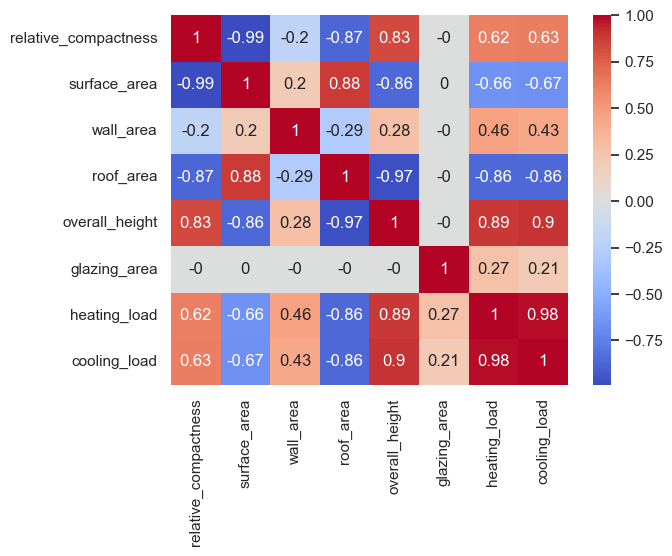

In [28]:
sns.heatmap(df.drop(labels=["orientation", "glazing_area_distribution"] , axis=1).corr().round(2), annot=True, cmap="coolwarm")

## Features

<Axes: xlabel='relative_compactness', ylabel='Count'>

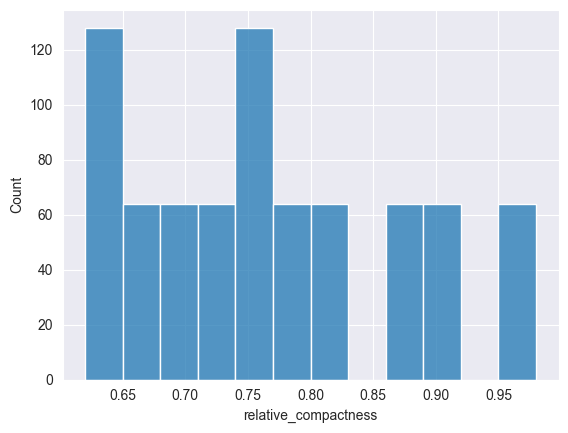

In [22]:
sns.histplot(df, x='relative_compactness')

<Axes: xlabel='surface_area', ylabel='Count'>

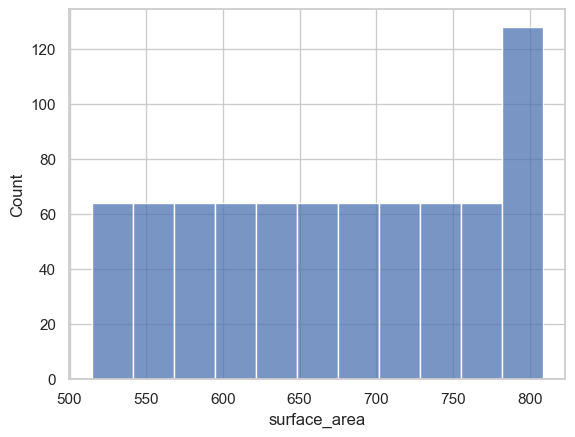

In [13]:
sns.histplot(df, x='surface_area')

<Axes: xlabel='wall_area', ylabel='Count'>

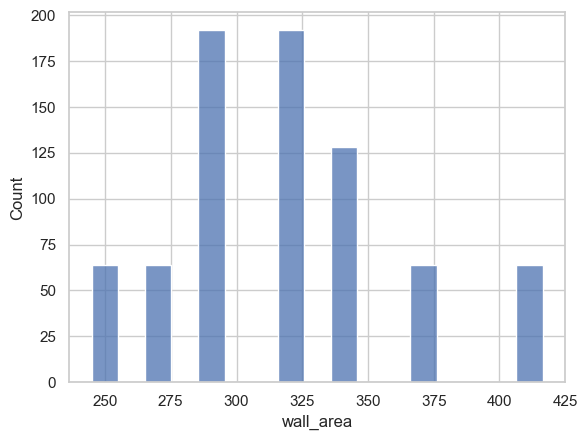

In [14]:
sns.histplot(df, x='wall_area')

<Axes: xlabel='roof_area', ylabel='Count'>

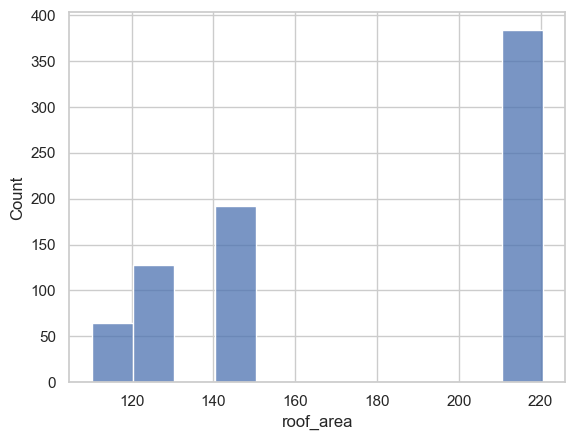

In [18]:
sns.histplot(df, x='roof_area')

<Axes: xlabel='overall_height', ylabel='Count'>

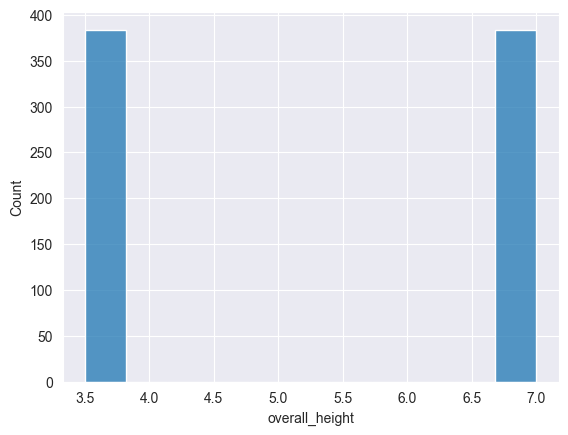

In [23]:
sns.histplot(df, x='overall_height')

<Axes: xlabel='orientation', ylabel='Count'>

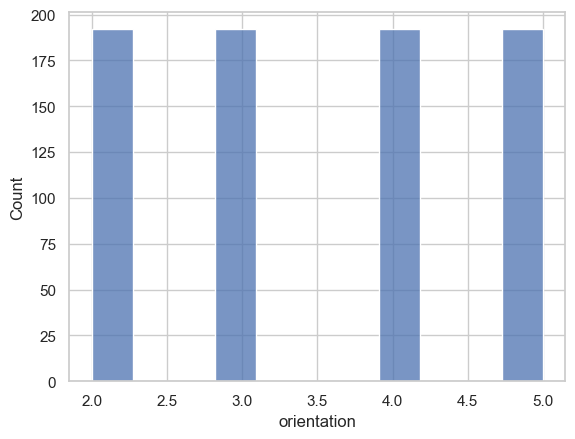

In [19]:
sns.histplot(df, x='orientation')

<Axes: xlabel='glazing_area', ylabel='Count'>

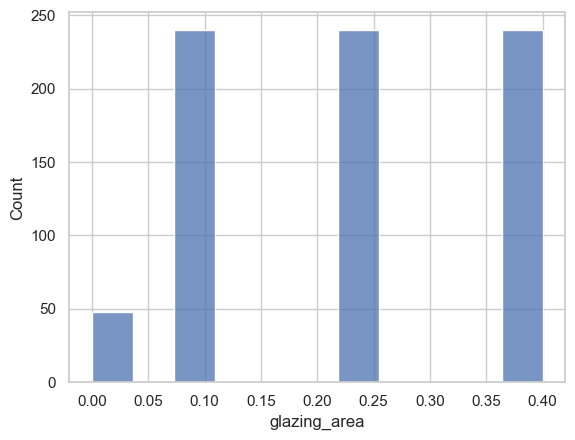

In [20]:
sns.histplot(df, x='glazing_area')

<Axes: xlabel='glazing_area_distribution', ylabel='Count'>

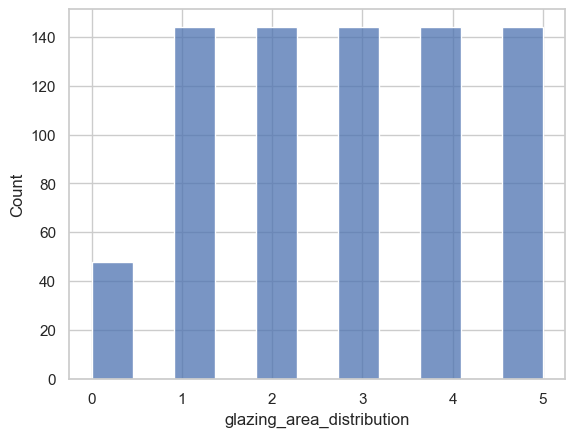

In [22]:
sns.histplot(df, x='glazing_area_distribution')

## Target Variables

<Axes: xlabel='heating_load', ylabel='Count'>

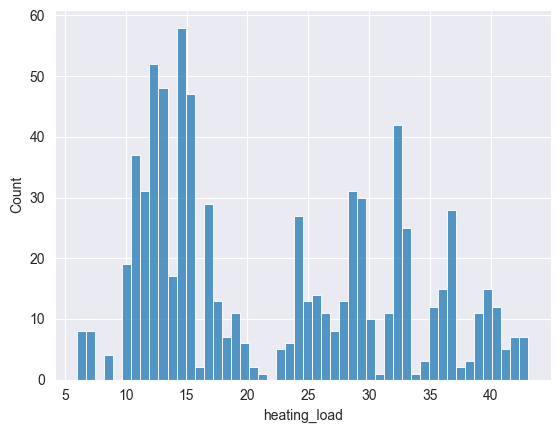

In [12]:
# distribution of target variable heating load
sns.histplot(df, x='heating_load', bins=50)

<Axes: xlabel='cooling_load', ylabel='Count'>

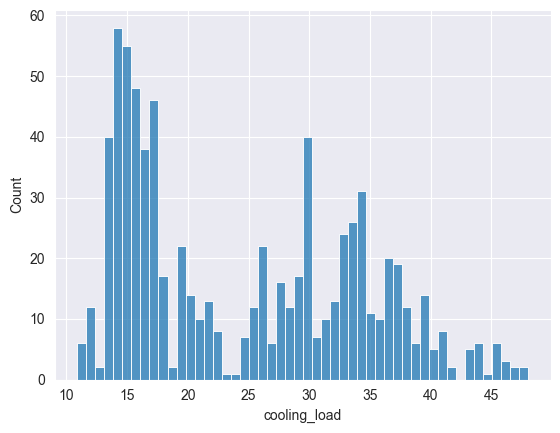

In [13]:
# distribution of target variable cooling load
sns.histplot(df, x='cooling_load', bins=50)

Text(0, 0.5, 'Count')

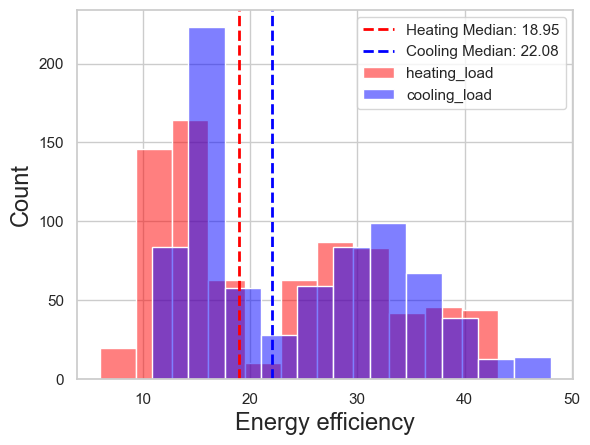

In [25]:
sns.histplot(data=df, x="heating_load", color="red", label="heating_load", alpha=0.5)
sns.histplot(data=df, x="cooling_load", color="blue", label="cooling_load", alpha=0.5)

median_heating = df["heating_load"].median()
median_cooling = df["cooling_load"].median()

plt.axvline(median_heating, color='red', linestyle='--', linewidth=2, label=f'Heating Median: {median_heating:.2f}')
plt.axvline(median_cooling, color='blue', linestyle='--', linewidth=2, label=f'Cooling Median: {median_cooling:.2f}')

plt.legend()
plt.xlabel('Energy efficiency', size = 17)
plt.ylabel('Count', size = 17)